In [18]:
import math
import torch

def get_timestep_embedding(timesteps, embedding_dim):
    """
    This matches the implementation in Denoising Diffusion Probabilistic Models:
    From Fairseq.
    Build sinusoidal embeddings.
    This matches the implementation in tensor2tensor, but differs slightly
    from the description in Section 3.5 of "Attention Is All You Need".
    """
    assert len(timesteps.shape) == 1

    half_dim = embedding_dim // 2
    emb = math.log(10000) / (half_dim - 1)
    emb = torch.exp(torch.arange(half_dim, dtype=torch.float32) * -emb)
    emb = emb.to(device=timesteps.device)
    emb = timesteps.float()[:, None] * emb[None, :]
    emb = torch.cat([torch.sin(emb), torch.cos(emb)], dim=1)
    if embedding_dim % 2 == 1:  # zero pad
        emb = torch.nn.functional.pad(emb, (0,1,0,0))
    return emb

In [36]:
t = torch.arange(0, 100, 1)
embedding = get_timestep_embedding(t, 32)
print(embedding.shape)

torch.Size([100, 32])


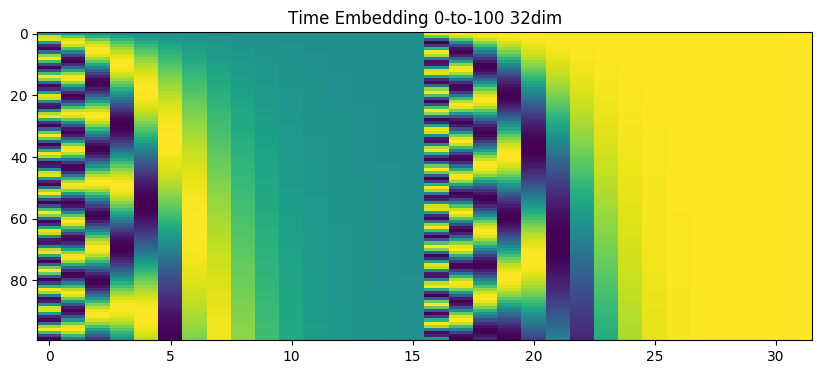

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=[10, 4])
plt.title('Time Embedding 0-to-100 32dim')
plt.imshow(embedding, aspect='auto')
plt.show()